# Basic import and data cleaning

In [ ]:
import numpy as np
import pandas as pd

In [ ]:

# df = pd.read_csv('/content/jd_data_for_train.csv',header=[0])

# df = pd.read_csv('/content/jd_data main.csv',header=[0])

df = pd.read_csv('/content/jd_for_train_f.csv',header=[0])









# df = pd.read_csv('/content/jd_data.csv',header=[0],encoding='cp1252')


In [ ]:
# df=df.iloc[:200,:]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1904 entries, 0 to 1903
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   JD         1904 non-null   object
 1   job_title  1904 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 29.9+ KB


In [ ]:
df.columns = ['JD','job_title']

In [ ]:
df.head()

,JD,job_title
0,The candidate must have around 1-3 years of bl...,0
1,Collaborating with managers to determine block...,0
2,1) Collaborating with managers to determine bl...,0
3,We are looking who can join ASAP on Blockchain...,0
4,Candidate should be able to: Collaborate with ...,0


In [ ]:
df.tail()

,JD,job_title
1899,Favor’s mission is ‘Anything Delivered’. Our E...,10
1900,--------------\nAbout the team\n--------------...,10
1901,ABOUT ENVIEW\n\nEnview creates a digital twin ...,10
1902,Description:At Lockheed Martin Rotary & Missio...,10
1903,Staff Data Scientist - EngineeringFor the firs...,10


In [ ]:
df.shape

(1904, 2)

## Finding unique values and its count in datset

In [ ]:
print(df['job_title'].unique())

[ 0  1  2  3  4  5  6  7  8  9 10]


In [ ]:
# e=['11']
# b=df["job_title"].isin(e)
# df[b]

In [ ]:
item_counts = df["job_title"].value_counts()
print(item_counts)

4     184
7     180
6     175
10    175
0     173
2     171
3     171
8     171
9     171
1     170
5     163
Name: job_title, dtype: int64


In [ ]:
item_counts = df["job_title"].value_counts()
print(item_counts)

In [ ]:
# # Get one hot encoding of columns B
# one_hot = pd.get_dummies(df['job_title'])
# # Drop column B as it is now encoded
# df = df.drop('job_title',axis = 1)
# # Join the encoded df
# df = df.join(one_hot)

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df['JD'], 
                                                    df['job_title'], 
                                                    test_size=0.3, 
                                                    stratify=df['job_title'], 
                                                    random_state=42)

In [ ]:
print(np.shape(x_train),np.shape(y_train),np.shape(x_test),np.shape(y_test))



(1332,) (1332,) (572,) (572,)


## One hot encoding

In [ ]:
y_train = pd.get_dummies(y_train)
y_test = pd.get_dummies(y_test)


In [ ]:
y_test.shape

(572, 11)

In [ ]:
import tensorflow_hub as hub

# encoder = hub.load('https://tfhub.dev/google/universal-sentence-encoder/4')

In [ ]:
import tensorflow as tf
model = tf.keras.models.Sequential()

# Pretrain model

In [ ]:
model.add(hub.KerasLayer('https://tfhub.dev/google/universal-sentence-encoder/4', 
                        input_shape=[], 
                        dtype=tf.string, 
                        trainable=False))

In [ ]:
from keras.layers import Activation, Dense

In [ ]:
model.add(Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(11, activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 512)               256797824 
                                                                 
 dense (Dense)               (None, 4)                 2052      
                                                                 
 dense_1 (Dense)             (None, 11)                55        
                                                                 
Total params: 256,799,931
Trainable params: 2,107
Non-trainable params: 256,797,824
_________________________________________________________________


In [ ]:
# [print(i.shape, i.dtype) for i in model.inputs]
# [print(o.shape, o.dtype) for o in model.outputs]
# [print(l.name, l.input_shape, l.dtype) for l in model.layers]

# Train

In [ ]:
history=model.fit(x_train,  y_train, epochs=260,  validation_data=(x_test, y_test))

In [ ]:
import matplotlib.pyplot as plt

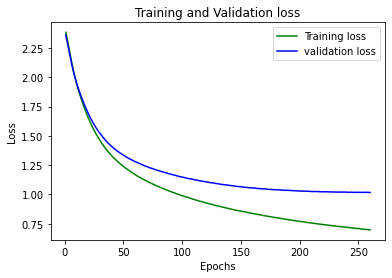

In [ ]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,261)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

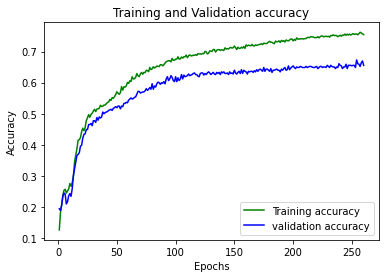

In [ ]:
loss_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,261)
plt.plot(epochs, loss_train, 'g', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Text extraction and cleaning

In [ ]:
!pip install PyMuPDF

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 14.0 MB 4.1 MB/s 


In [ ]:
import fitz
import re    #module for regular expression operations


In [ ]:
def pymupdf_extract(file_path):
  # OCR the PDF using the default 'text' parameter
  ocr_text=[]
  with fitz.open(file_path) as doc:
      for page in doc:
          text = page.get_text()
          ocr_text.append(text)
          # print(text)
  return ocr_text

In [ ]:
def cleaning(text):
    text_data=re.sub(r'\\n', ' ',text)
    text_data=text_data.strip()
    text_data=text_data.lower()
    text_data=text_data.replace('education',' ')
    text_data=text_data.replace('experience',' ')
    text_data=text_data.replace('skills',' ')
    text_data=text_data.replace('university',' ')
    text_data=text_data.replace('gmail',' ')
    text_data=text_data.replace('objective',' ')
    text_data=text_data.replace('about',' ')
    text_data=text_data.replace('fusemachines',' ')
    text_data=text_data.replace('responsibilities',' ')
    text_data=re.sub(r'https?:\/\/.*?[\s+]', ' ', text_data)
    text_data= re.sub(r'[^a-z]', ' ',text_data )
    # print(text_data)
    return text_data

In [ ]:
#demo
model.predict([" anjil adhikari is machine learning engineer"])

1/1 [==============================] - 1s 624ms/step


array([[0.02982932, 0.8303496 , 0.669557  , 0.02056357, 0.0101538 ,
        0.01960878, 0.47661346, 0.9737785 , 0.04800992, 0.04518635,
        0.97478807]], dtype=float32)

In [ ]:
def function_pred(cv_p):
  cv_path= cv_p
  cv_mess_text=pymupdf_extract(cv_path)
  cv_clean_text=cleaning((str(cv_mess_text)))
  prob=model.predict([cv_clean_text])
  return prob


In [ ]:
# path ="/content/Data  Engineer/Jain, Rishabh - 2022-06-24 08-08-31.pdf"


# prob=function_pred(path)

1/1 [==============================] - 0s 42ms/step


# Updating in sheets function

In [ ]:
from google.colab import auth
auth.authenticate_user()
import gspread
from google.auth import default

creds, _ = default()

gc = gspread.authorize(creds)

In [ ]:
def update_cell(number,score):

  worksheet = gc.open('prob').sheet1
  next = f"B{number}:L{number}"
  # print(next)
  cell_list = worksheet.range(next)
  for i,cell in enumerate(cell_list):
    cell.value =  score[i]
  worksheet.update_cells(cell_list)

In [ ]:
number= 114

# Update each time

In [ ]:
path =  "/content/blockchain/acharya, rupak - 2022-06-20 17-40-15.pdf"
prob=function_pred(path)
prob=prob.tolist()

prob=prob[0]
prob =[num*10 for num in prob]
update_cell(number,prob)
number+=1

prob

1/1 [==============================] - 0s 56ms/step


[9.875483512878418,
 2.9730853889908815e-09,
 0.0013755662075709552,
 0.14660747721791267,
 9.068089723587036,
 9.407216906547546,
 7.922490239143372,
 0.07390428334474564,
 0.7500558346509933,
 9.273894429206848,
 1.5885468938534042e-11]